#Librerías

In [3]:
#Librerías básicas para manejo de datos y creación de gráficos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Librería para estandarizar datos
from sklearn.preprocessing import StandardScaler

#Librería para aplicar PCA y crear los nuevos vectores
from sklearn.decomposition import PCA

#Librería para crear el modelo regresión logística y predecir
from sklearn.linear_model import LogisticRegression

#Librería para crear matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Carga de bases de datos

In [4]:
# Base de datos de entrenamiento
df_f_mnist_train = pd.read_csv('fashion-mnist_train.csv')

# Base de datos para prueba
df_f_mnist_test = pd.read_csv('fashion-mnist_test.csv')

## Separación de bases de datos en variables independientes y dependiente

In [5]:
#Separación para base de datos de entrenamiento
df_f_mnist_train_X = df_f_mnist_train.iloc[:,1:].values
df_f_mnist_train_Y = df_f_mnist_train.iloc[:,0].values

#Separación para base de datos de prueba
df_f_mnist_test_X = df_f_mnist_test.iloc[:,1:].values
df_f_mnist_test_Y = df_f_mnist_test.iloc[:,0].values

#Estandarización de datos

In [6]:
#Se llama a la función para estandarizar
scal = StandardScaler()

#Se ajusta la estandarización solo a los datos de entrenamiento
scal.fit(df_f_mnist_train_X)

#Se aplica la estandarización a ambas matrices con parámetros de la matriz de entrenamiento
train_X_st = scal.transform(df_f_mnist_train_X)
test_X_st = scal.transform(df_f_mnist_test_X)

In [11]:
np.var(train_X_st, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# Aplicación de PCA

In [12]:
#Se llama a la función para aplicar PCA y crear los vectores
pca = PCA(0.95) #Se requieren los primeros vectores cuya suma de porcentaje de varianza sea el 95%

#Se ajusta el PCA solo para la matriz de entrenamiento
pca.fit(train_X_st)

#Se aplica PCA a ambas matrices y se obtienen los nuevos vectores ortogonales
train_X_pca = pca.transform(train_X_st)
test_X_pca = pca.transform(test_X_st)

In [13]:
#Tamaño de la matriz con los vectores propios
np.shape(train_X_pca)
#Se redujeron de 784 variables a solo 256

(60000, 256)

#Modelo de regresión logística con PCA (0.95)



In [14]:
#Se llama a la función de regresión logística con el algoritmo lbfgs
logisticRegr = LogisticRegression(solver = 'lbfgs')

#Se aplica regresión logística a las variables independientes y dependiente de entrenamiento
logisticRegr.fit(train_X_pca, df_f_mnist_train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
#Score que compara los resultados predichos por el modelo y los reales de la base de datos de prueba
logisticRegr.score(test_X_pca, df_f_mnist_test_Y)
#85.75% de los datos puede ser predicho por el modelo.

0.8575

In [16]:
y_pred = logisticRegr.predict(test_X_pca)

cm = confusion_matrix(df_f_mnist_test_Y, y_pred)

cm

array([[821,   4,  19,  38,   0,   3, 100,   1,  12,   2],
       [  0, 974,   1,  15,   2,   1,   7,   0,   0,   0],
       [ 15,   4, 774,  10, 110,   0,  78,   0,   9,   0],
       [ 30,  23,  16, 884,  22,   1,  23,   0,   1,   0],
       [  1,   1,  73,  30, 811,   2,  77,   1,   4,   0],
       [  2,   2,   0,   1,   0, 924,   1,  47,   5,  18],
       [153,   4, 103,  35,  90,   4, 596,   0,  14,   1],
       [  0,   0,   0,   0,   0,  39,   0, 915,   2,  44],
       [  6,   0,   8,   4,   5,   8,  26,   4, 933,   6],
       [  0,   0,   0,   0,   0,  16,   0,  40,   1, 943]])

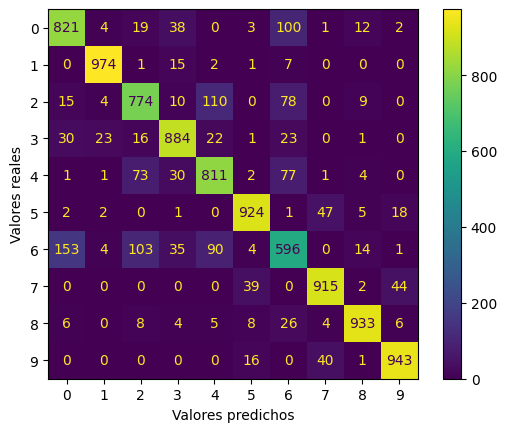

In [27]:
ConfusionMatrixDisplay.from_estimator(logisticRegr, test_X_pca, df_f_mnist_test_Y)
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.show()

## Predicción de valor en crudo (Pullover)

In [18]:
df_f_mnist_test.iloc[[2]]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


In [19]:
z = df_f_mnist_test.iloc[[2], 1:].values
z = scal.transform(z)
z = pca.transform(z)
logisticRegr.predict(z)

array([2])

#Modelo de regresión logística sin PCA

In [28]:
logisticRegr_full = LogisticRegression(solver = 'lbfgs')

logisticRegr_full.fit(df_f_mnist_train_X, df_f_mnist_train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
#Score
logisticRegr_full.score(df_f_mnist_test_X, df_f_mnist_test_Y)

0.8544

# Gráfica para visualizar agrupación de los resultados con PCA de 2 vectores

In [29]:
pca2 = PCA(2)
pca2.fit(train_X_st)

train_X_pca2 = pca2.transform(train_X_st)
test_X_pca2 = pca2.transform(test_X_st)



In [30]:
logisticRegr_2 = LogisticRegression(solver = 'lbfgs')

logisticRegr_2.fit(train_X_pca2, df_f_mnist_train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
logisticRegr_2.score(test_X_pca2, df_f_mnist_test_Y)

0.5059

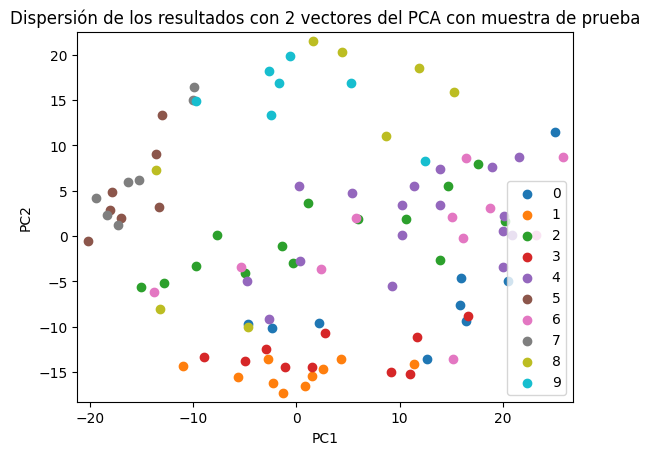

In [32]:
X_set, y_set = test_X_pca2[0:100], df_f_mnist_test_Y[0:100]

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)

# title for scatter plot
plt.title('Dispersión de los resultados con 2 vectores del PCA con muestra de prueba')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()